# From State Vectors to Bloch Spheres

_course: quantum cryptography for beginners
<br>date: 26 august 2024
<br>author: burton rosenberg_

----


We begin with the general statement of a qubit,
$$
|\phi\rangle = \alpha |0\rangle + \beta |1\rangle,\qquad ||\alpha||^2+||\beta||^2 = 1,  \qquad \alpha, \beta\in\mathbb{C}
$$
and propose it written as,
$$
\begin{pmatrix} \rho_a \,e^{i\phi_a}\\\rho_b\, e^{i\phi_b}\end{pmatrix}
$$
where $\rho_a, \rho_b \ge 0$,and $\phi_a, \phi_b\in[0,2 \pi)$.

Concerning that the vector be a unit vector, 
\begin{eqnarray}
||\rho_a \,e^{i\phi_a}||^2 + || \rho_b \,e^{i\phi_b}||^2 
&=& ||e^{i\phi_a}||^2 ||\rho_a||^2 +  ||e^{i\phi_b}||^2 ||\rho_b||^2\\
&=& ||\rho_a||^2 +   ||\rho_b||^2\\
&=& (\cos \theta/2)^2 +  (\sin \theta/2)^2  \qquad \theta\in [0,\pi ]\\
\end{eqnarray}
where I have used that $\rho_a$ and $\rho_b$ are non-negative reals whose squares sum to one.

The state vector is now written as,
$$
e^{i\gamma}
\begin{pmatrix} 
    e^{-i\,\phi/2}\,\cos \theta/2 \\ 
    e^{+i\,\phi/2}\,\sin\theta/2
\end{pmatrix}
\qquad  \theta\in [0,\pi ],\quad \phi\in[-\pi,\pi]
$$
where,
\begin{eqnarray}
\gamma &=& (\phi_a+\phi_b)/2\\
\phi &=& \phi_b-\phi_a
\end{eqnarray}

The Bloch sphere does not distiguish states that differ only by a global phase $e^{i\gamma}$, that is,
$$
|\phi\rangle \equiv e^{i\gamma}\,|\phi\rangle
$$
since this is an unobservable difference, as the probablities of each outcome is unaffected by the global phase.

Therefore we have Bloch sphere coordinates $(\theta, \phi)$ (an optionally the global phase $\gamma$) given by,
\begin{eqnarray}
\cos \theta/2 &=& ||\alpha|| \\
\phi &=& \arg \phi_b - \arg \phi_a \\
\gamma &=& (\arg \phi_b + \arg \phi_a)/2
\end{eqnarray}

And the state vector coordinates $(\alpha,\beta)$ given by,
\begin{eqnarray}
\alpha &=& \cos(\theta/2)\,e^{-i\,\phi/2} \, e^{i\,\gamma}\\
\beta  &=& \sin(\theta/2)\,e^{+i\,\phi/2} \, e^{i\,\gamma}
\end{eqnarray}


In [11]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from IPython.display import display, Math

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')


qiskit version: 1.1.2



<IPython.core.display.Math object>

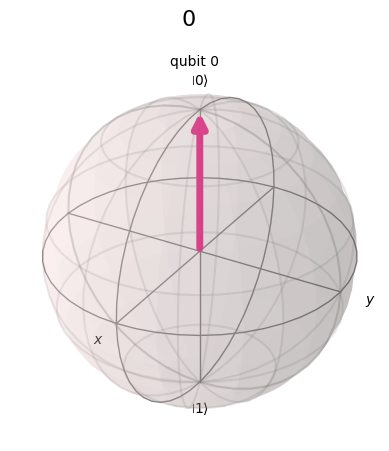

<IPython.core.display.Math object>

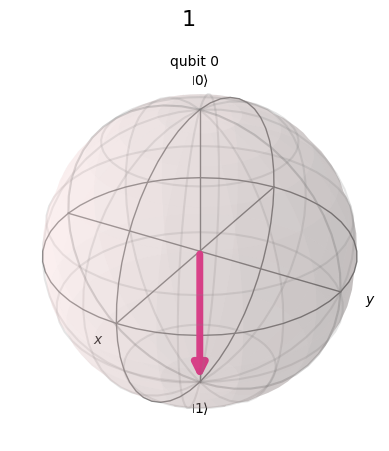

<IPython.core.display.Math object>

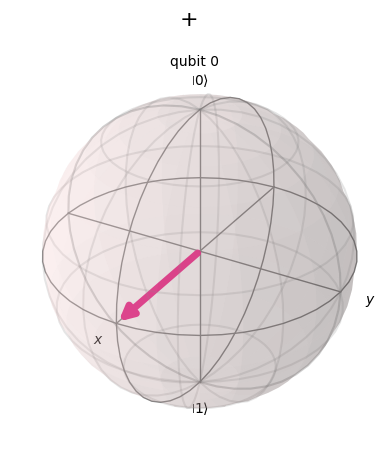

<IPython.core.display.Math object>

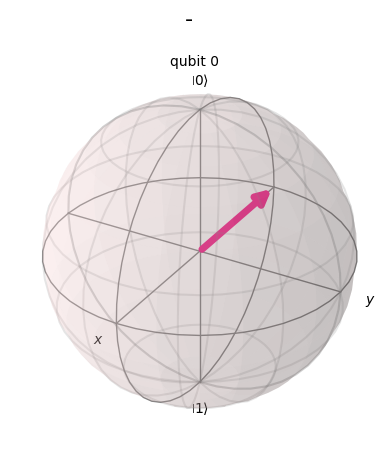

<IPython.core.display.Math object>

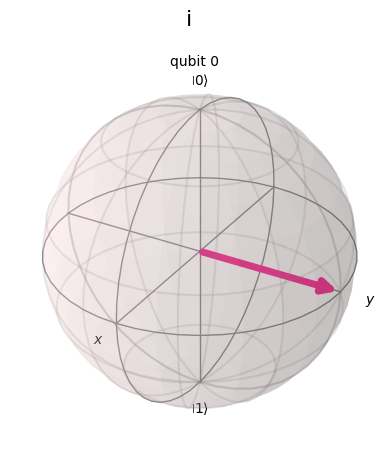

<IPython.core.display.Math object>

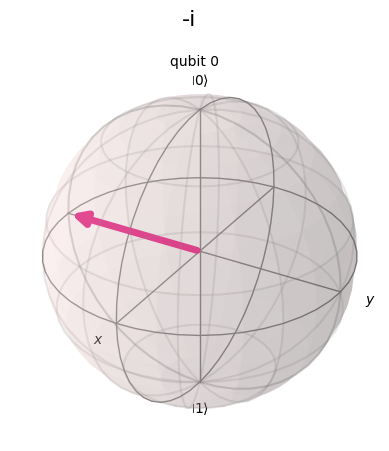

<IPython.core.display.Math object>

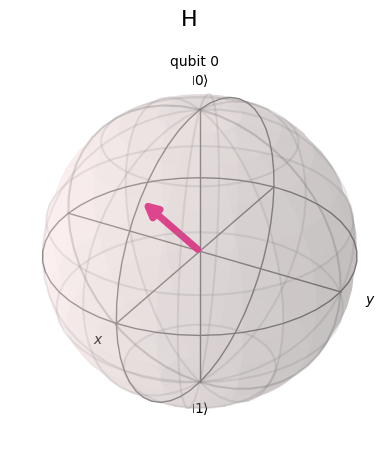

<IPython.core.display.Math object>

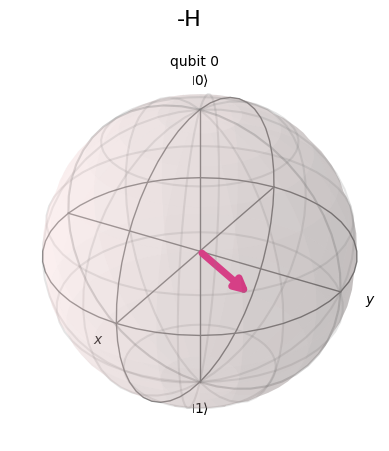

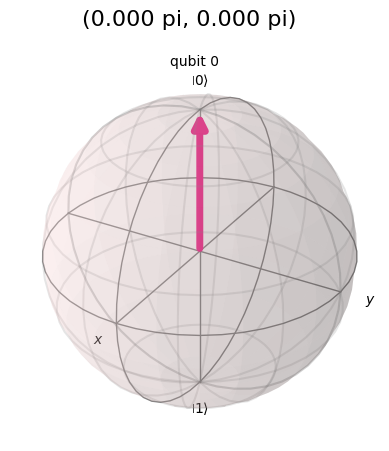

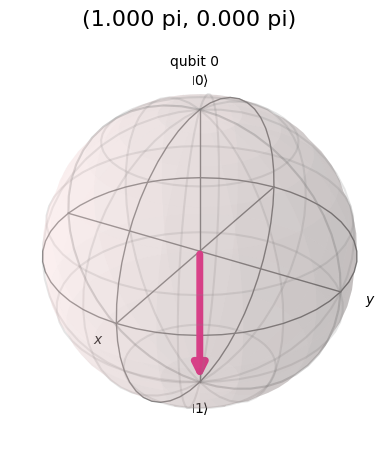

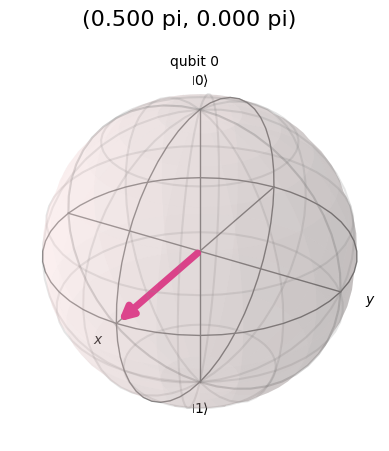

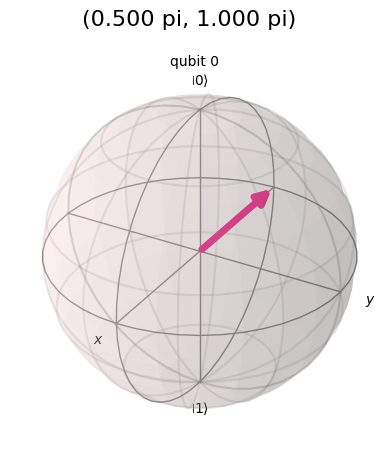

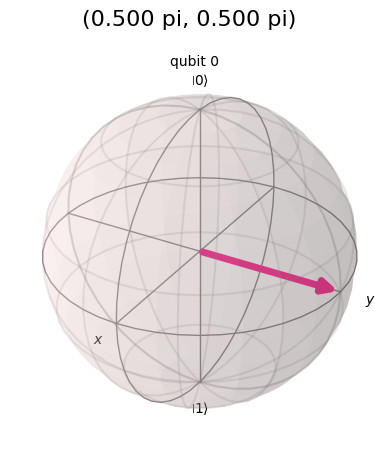

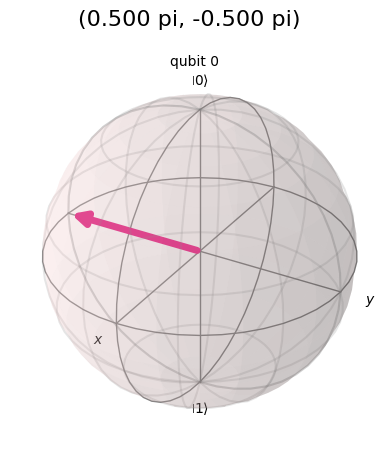

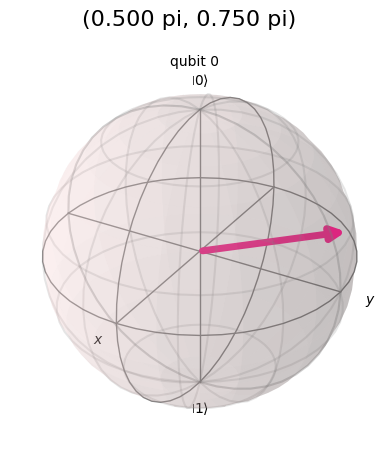

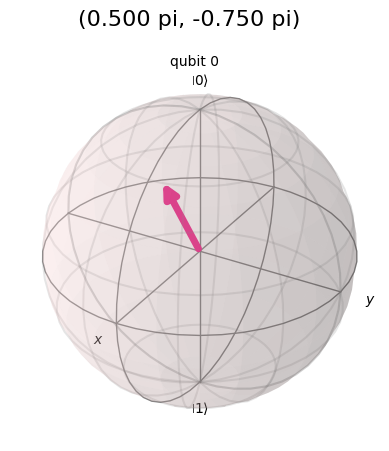

In [26]:
import math, cmath
import numpy as np

class Bloch:

    @staticmethod
    def to_bloch(state_vector, global_phase=False):
        alpha, beta = state_vector
        r = math.sqrt(abs(alpha)**2 + abs(beta)**2)
        alpha_p, beta_p = cmath.polar(alpha), cmath.polar(beta)
        theta = 2 * math.acos(alpha_p[0]/r)
        phi = beta_p[1] - alpha_p[1]
        gamma = (beta_p[1] + alpha_p[1])/2
        if global_phase: 
            return (theta, phi, gamma)
        return (theta,phi)

    @staticmethod
    def to_statevector(bloch):
        alpha = math.cos(bloch[0]/2)*cmath.exp((-1j)*bloch[1]/2)
        beta  = math.sin(bloch[0]/2)*cmath.exp((+1j)*bloch[1]/2)
        if len(bloch)==3:
            alpha = alpha * cmath.exp(1j*bloch[2])
            beta = beta * cmath.exp(1j*bloch[2])
        return (alpha, beta)

    @staticmethod
    def print_statevector(sv):
        print(Bloch.tostring_statevector(sv))
        
    @staticmethod
    def print_bloch(b):
        print(Bloch.tostring_bloch(b))

    @staticmethod
    def tostring_statevector(sv):
        return f'{sv[0]:4.3f} |0> + {sv[1]:4.3f} |1>'
        
    @staticmethod
    def tostring_bloch(b): 
        s = ''
        s = s + f'({(b[0]/math.pi):3.3f} pi, {(b[1])/math.pi:3.3f} pi'
        if len(b)==3:
            s = s + f', {(b[2]/math.pi):3.3f} pi)'
        else:
            s = s + ')'
        return s

    @staticmethod
    def show_bloch(bv, title=""):
        sv = Bloch.to_statevector(bv)
        Bloch.show_statevector(sv, title)
        
    @staticmethod
    def show_statevector(sv, title=""):
        r = math.sqrt(abs(sv[0])**2+abs(sv[1])**2)
        sv_ = Statevector([sv[0]/r, sv[1]/r])
        b_s = plot_bloch_multivector(sv_, title)
        display(b_s)

v1 = np.array([1+np.sqrt(2),1]) 
v2 = np.array([1-np.sqrt(2),1])
v1 = v1/np.sqrt(v1.dot(v1))
v2 = v2/np.sqrt(v2.dot(v2))

state_vectors = {'0':[1,0], '1':[0,1], '+':[1,1], '-':[1,-1], 'i':[1-1j,1+1j], '-i':[1+1j,1-1j],'h':v1,'-h':v2}
bloch_vectors = {'0':[0,0], '1':[1*math.pi,0], '+':[0.5*math.pi,0], '-':[0.5*math.pi,math.pi],
                 'i':[0.5*math.pi,0.5*math.pi], 'I':[0.5*math.pi,-0.5*math.pi], 
                 'R':[0.5*math.pi,0.75*math.pi], 'L':[0.5*math.pi,-0.75*math.pi]}

for sv in state_vectors:
    s = Bloch.tostring_statevector(state_vectors[sv])
    display(Math(rf'|{sv}\rangle'))
    Bloch.show_statevector(state_vectors[sv], title=sv)

for bv in bloch_vectors:
    s = Bloch.tostring_bloch(bloch_vectors[bv])
    Bloch.show_bloch(bloch_vectors[bv], title=s)
